#Sales Forecasting Model using Python with time-series forecasting

Step 1: Install Required Libraries

Make sure you have pandas, numpy, matplotlib, and statsmodels installed. You can install them using:

In [22]:
pip install pandas numpy matplotlib statsmodels

Step 2: Import Libraries

Start by importing the necessary libraries:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

Step 3: Load and Prepare the Data

<ipython-input-24-b8b66bc4c933>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2022-01-01', periods=24, freq='M'),


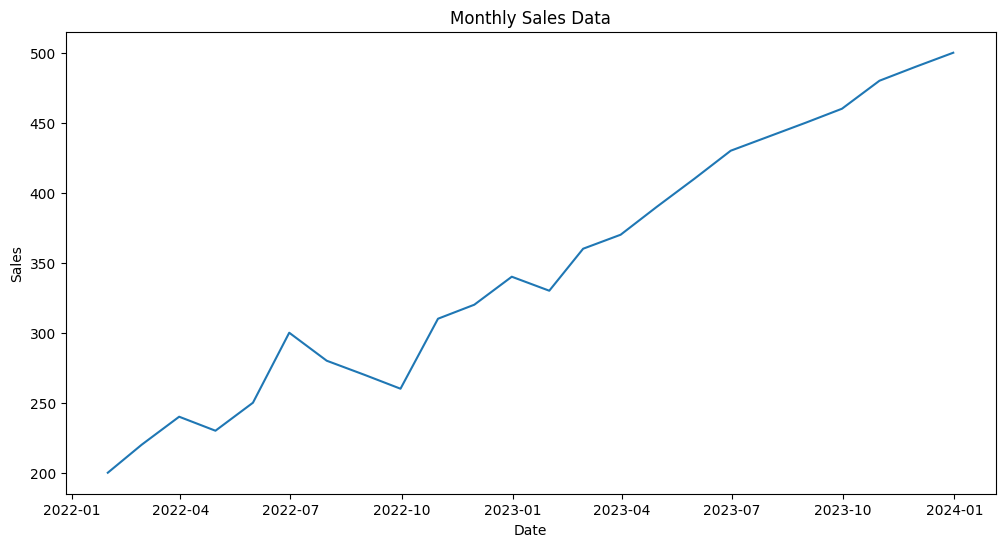

In [24]:
# Dummy data: Monthly sales
data = {
    'Date': pd.date_range(start='2022-01-01', periods=24, freq='M'),
    'Sales': [200, 220, 240, 230, 250, 300, 280, 270, 260, 310, 320, 340,
              330, 360, 370, 390, 410, 430, 440, 450, 460, 480, 490, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Visualize the sales data
plt.figure(figsize=(12, 6))  # Width = 12, Height = 6 (you can customize these values)
plt.plot(df['Sales'])
plt.title("Monthly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

Step 4: Check Stationarity of the Data

ARIMA assumes the time series is stationary. If it's not, use differencing to make it stationary.

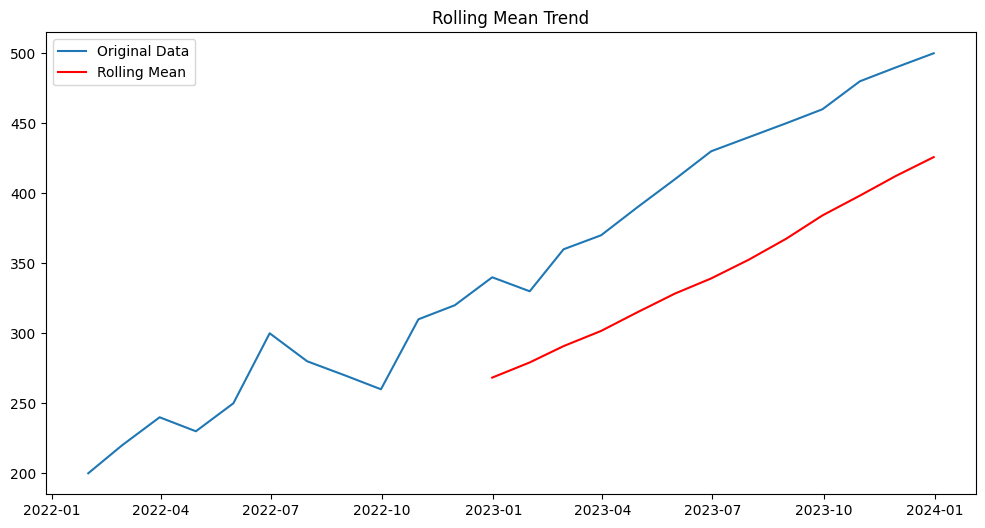

In [25]:
plt.figure(figsize=(12, 6))  # Width = 12, Height = 6 (you can customize these values)

# Check stationarity using rolling statistics
rolling_mean = df['Sales'].rolling(window=12).mean()
plt.plot(df['Sales'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.title("Rolling Mean Trend")
plt.show()

If the series is non-stationary, apply differencing

In [26]:
df['Sales_diff'] = df['Sales'].diff().dropna()

Step 5: Fit the ARIMA Model

Identify the p, d, and q parameters using ACF and PACF plots.

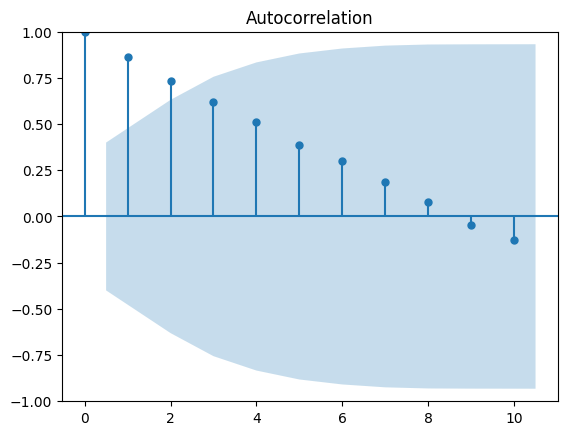

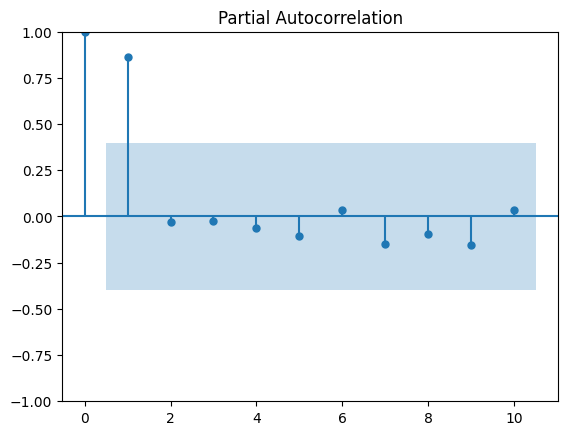

In [27]:
# ACF and PACF plots
plot_acf(df['Sales'].dropna(), lags=10)
plot_pacf(df['Sales'].dropna(), lags=10)
plt.show()

Fit the ARIMA model with chosen parameters:

In [7]:
model = ARIMA(df['Sales'], order=(2, 1, 1))  # Adjust (p, d, q) as needed
arima_model = model.fit()
print(arima_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -99.285
Date:                Sun, 23 Mar 2025   AIC                            206.570
Time:                        16:47:27   BIC                            211.112
Sample:                    01-31-2022   HQIC                           207.712
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8179      0.183      4.457      0.000       0.458       1.178
ar.L2          0.1821      0.183      0.994      0.320      -0.177       0.541
ma.L1         -0.9975      0.308     -3.241      0.0

Step 6: Make Predictions

Forecast: 2024-01-31    512.743239
2024-02-29    524.986870
2024-03-31    537.321422
2024-04-30    549.639358
2024-05-31    561.960262
2024-06-30    574.280566
Freq: ME, Name: predicted_mean, dtype: float64


<ipython-input-28-c78a19025c42>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=7, freq='M')[1:], forecast, label="Forecast", color='red')


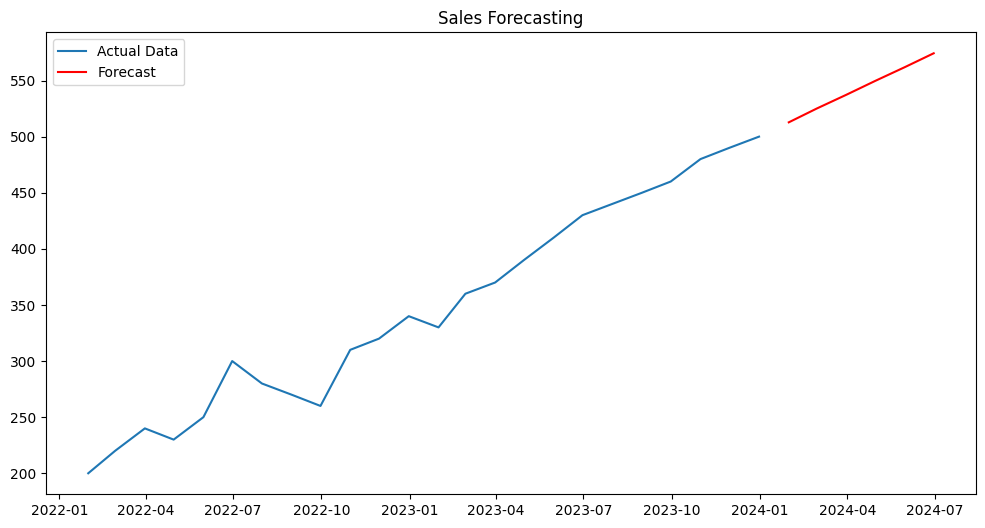

In [28]:
# Forecast
forecast = arima_model.forecast(steps=6)  # Forecasting 6 months
print("Forecast:", forecast)

# Visualize
plt.figure(figsize=(12, 6))  # Width = 12, Height = 6 (you can customize these values)
plt.plot(df['Sales'], label="Actual Data")
plt.plot(pd.date_range(start=df.index[-1], periods=7, freq='M')[1:], forecast, label="Forecast", color='red')
plt.title("Sales Forecasting")
plt.legend()
plt.show()

Step 7: Evaluate the Model

In [29]:
# Example: Replace with your actual test sales values
y_true = [440, 450, 460, 470, 480, 490]  # Example test data for 6 months
mse = mean_squared_error(y_true, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6176.056232487485
